In [1]:
import glob
import os, sys, subprocess
import ROOT as rt
import re

%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.18/02


In [2]:
#indir1 = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_fromZhicai_nJetsLT3_DNN/'
#indir1 = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_fromZhicai_skimmed/'
#indir1 = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/Zhicai_fromHadoop_skim_noBDT/'
indir1 = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/preprocessing/skim_analyzer_output_reproduce/'
filelist = glob.glob(indir1+'/*.root')
#data_DNN = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_fromZhicai_nJetsLT3_DNN/DelayedPhoton_DoubleEG_2016All_GoodLumi.root'
#data_DNN = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output/DelayedPhoton_DoubleEG_2016All_GoodLumi.root'
data_DNN = indir1+'/DelayedPhoton_DoubleEG_2016All_GoodLumi.root'
signal_file_name = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/preprocessing/skim_analyzer_output_triggerEffCuts/GMSB_L300TeV_Ctau200cm_13TeV-pythia8.root'
all_signal_file = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/preprocessing/GMSB_triggerEffCuts.root'

lumi_2016 = 35922.0
lumi_2017 = 41530.0
lumi = lumi_2016

#backgrounds = ['DiPhoton', 'GJets', 'QCD']
sample_list = {'DiPhoton': [],
               'GJets': [],
               'QCD': [],
                'Z': [],
                'W': [],
                'T': [],
                'tt': []
              }

sample_color = {'DiPhoton': rt.kGreen,
                'GJets': rt.kBlue,
                'QCD': rt.kMagenta,
                'GMSB': rt.kOrange-3,
                'GMSBAll': rt.kBlack,
                'Data': rt.kBlack,
                'Z': rt.kAzure+10,
                'W': rt.kAzure+10,
                'T': rt.kAzure+10,
                'tt': rt.kAzure+10}

for bkg in sample_list:
    for infile in filelist:
        if 'DelayedPhoton_{}'.format(bkg) in infile.split('/')[-1]:
            sample_list[bkg].append(infile)
            


In [3]:
pho_to_plot = 1

features = [#'t1MET', 
             'pho{}ecalPFClusterIso'.format(pho_to_plot), 
#             'pho{}hcalPFClusterIso'.format(pho_to_plot),
#             'pho{}trkSumPtHollowConeDR03'.format(pho_to_plot), 
#             'pho{}R9'.format(pho_to_plot), 
            'pho{}SigmaIetaIeta'.format(pho_to_plot), 
#             'pho{}Smajor'.format(pho_to_plot), 
#             'pho{}Sminor'.format(pho_to_plot),
#             'pho{}_genVtxZ'.format(pho_to_plot),
#             'R{}'.format(pho_to_plot),
#              'pho{}DNN'.format(pho_to_plot)
            ]

xranges = {'t1MET': (0., 200),
           'pho{}ecalPFClusterIso'.format(pho_to_plot): (0,7),
           'pho{}hcalPFClusterIso'.format(pho_to_plot): (0, 5),
           'pho{}trkSumPtHollowConeDR03'.format(pho_to_plot): (0,7),
           'pho{}R9'.format(pho_to_plot): (0.9,1.),
           'pho{}SigmaIetaIeta'.format(pho_to_plot): (0, 0.02),
           'pho{}Smajor'.format(pho_to_plot): (0, 1.5),
           'pho{}Sminor'.format(pho_to_plot): (0., 0.7),
           'pho{}angle_xtal'.format(pho_to_plot): (0, 1.),
           'pho{}_genVtxZ'.format(pho_to_plot): (-100, 100),
           'R{}'.format(pho_to_plot): (0, 100),
           'pho{}DNN'.format(pho_to_plot): (0, 1)
}

useLogY = {'t1MET': False,
           'pho{}ecalPFClusterIso'.format(pho_to_plot): True,
           'pho{}hcalPFClusterIso'.format(pho_to_plot): True,
           'pho{}trkSumPtHollowConeDR03'.format(pho_to_plot): True,
           'pho{}R9'.format(pho_to_plot): False,
           'pho{}SigmaIetaIeta'.format(pho_to_plot): True,
           'pho{}Smajor'.format(pho_to_plot): True,
           'pho{}Sminor'.format(pho_to_plot): True,
           'pho{}angle_xtal'.format(pho_to_plot): True,
           'pho{}_genVtxZ'.format(pho_to_plot): False,
           'R{}'.format(pho_to_plot): False,
           'pho{}DNN'.format(pho_to_plot): True
}

textPosition = {'t1MET': (100, 10000),
           'pho{}ecalPFClusterIso'.format(pho_to_plot): (1, 1.5e4),
           'pho{}hcalPFClusterIso'.format(pho_to_plot): (3, 3e4),
           'pho{}trkSumPtHollowConeDR03'.format(pho_to_plot): (3, 3e4),
           'pho{}R9'.format(pho_to_plot): (0.905, 7000),
           'pho{}SigmaIetaIeta'.format(pho_to_plot): (0.002, 2e4),
           'pho{}Smajor'.format(pho_to_plot): (1, 3e4),
           'pho{}Sminor'.format(pho_to_plot): (0.4, 1e4),
           'pho{}angle_xtal'.format(pho_to_plot): (0, 0),
           'pho{}_genVtxZ'.format(pho_to_plot): (0, 0),
           'R{}'.format(pho_to_plot): (0,0),
           'pho{}DNN'.format(pho_to_plot): (0.7, 8e3)
}

In [4]:
def getXS(sample):
    with open("/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/data/all_bkg_back.list", "r") as xsfile:
        allxs = xsfile.readlines()
        for xs in allxs:
            if xs.split(' ')[0] in sample:
                return xs.split(' ')[-1].replace('\n','')
    print("[WARNING] {} cross section not found".format(sample))
    return 0

def extract_num(string):
    sample_num = list(map(int, re.findall(r'\d+', string.split('/')[-1])))
    if len(sample_num) > 1:
        sample_lambda, sample_ctau = sample_num[0], sample_num[1]
        if sample_ctau == 0:
            if "0_001cm" in string:
                sample_ctau = 0.001
            elif "0_01cm" in string:
                sample_ctau = 0.01
            elif "0_1cm" in string:
                sample_ctau = 0.1

        return sample_lambda, sample_ctau
    else:
        print("Can't extract number from {}".format(string))
        return 0, 0

def getSignalXS(sample):
    """Get cross section x BR for signal MC"""
    sample_lambda, sample_ctau = extract_num(sample)

    dat_file = "/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/data/XsecBR.dat"
    with open(dat_file, "r") as xsfile:
        allxs = xsfile.readlines()
        for xs in allxs[1:]:
            this_lambda, this_ctau = extract_num(xs)
            if sample_lambda == this_lambda and sample_ctau == this_ctau:
                return float(xs.split(' ')[4])
    print("[WARNING] {} cross section not found in {}".format(sample, dat_file))
    return 0

In [5]:
hstack = {}
hist_list = {}
signal_hist = {}
allsn_hist = {}
data_hist = {}

for fea in features:

    hstack[fea] = rt.THStack("hstack[{}]".format(fea),"")
    hist_list[fea] = []
    sample_index = {"DiPhoton": None,
                    "GJets": None,
                    "QCD": None,
                    "Z": None,
                    'W': None,
                    'T': None,
                    'tt': None}
    counter = 0
    
    event_cut = 'n_Jets > 2 && \
             n_Photons == 2 && \
             HLTDecision[81] == 1 && \
             abs(pho1ClusterTime_SmearToData) < 1.0 && HT > 200'

    pho_cut = ' && pho1Pt > 50 && abs(pho1Eta)<1.4442 \
                && abs(pho1HoverE) < 0.08 \
                && pho1R9 > 0.9 && abs(pho1SigmaIetaIeta) < 0.020 \
                && abs(pho1ecalPFClusterIso) < 7.5 \
                && abs(pho1hcalPFClusterIso) < 5.0 \
                && abs(pho1trkSumPtHollowConeDR03) < 7.5'

    for sample in sample_list:
        for bkg_file in sample_list[sample]:
            xs = getXS(bkg_file)
            tmp_file = rt.TFile.Open(bkg_file, "READ")
            tmp_tree = tmp_file.Get("DelayedPhoton")
            tmp_sw = tmp_file.Get("SumWeights")
            sumWeights = tmp_sw.Integral()

            if xs and xs != 0:
                if sample_index[sample] is None:
                    sample_index[sample] = counter
                sample_name = bkg_file.split('/')[-1]
                hist_list[fea].append(rt.TH1F("hist[{}][{}]{}".format(fea, sample_name, counter), 
                                              "{}; {}".format(sample, fea), 60, xranges[fea][0], xranges[fea][1]))


                met_cut = " && Flag_HBHENoiseFilter == 1 && Flag_HBHEIsoNoiseFilter ==1 && \
                       Flag_goodVertices == 1 && Flag_eeBadScFilter == 1 && \
                       Flag_EcalDeadCellTriggerPrimitiveFilter == 1 && \
                       Flag_CSCTightHaloFilter == 1  && \
                       Flag_badMuonFilter == 1 && Flag_badGlobalMuonFilter == 0 && \
                       Flag_duplicateMuonFilter == 0 "
                xsecOverSumweights = float(xs)/sumWeights
                weight_selection = "({event_cut} {pho_cut}) * (weight * \
                                    pileupWeight * {lumi} * {xsecOverSumweights})".format(event_cut=event_cut,
                                                                                        pho_cut = pho_cut,
                                                                                        met_cut=met_cut,
                                                                                        lumi=lumi,
                                                                                        xsecOverSumweights=xsecOverSumweights)
#                 weight_selection = "(HLTDecision[81] == 1) * (weight * \
#                                     pileupWeight * {lumi} * {xsecOverSumweights})".format(event_cut=event_cut,
#                                                                                         pho_cut = pho_cut,
#                                                                                         met_cut=met_cut,
#                                                                                         lumi=lumi,
#                                                                                         xsecOverSumweights=xsecOverSumweights)

                tmp_tree.Draw("{}>>hist[{}][{}]{}".format(fea, fea, sample_name, counter), weight_selection)
                hist_list[fea][-1].SetDirectory(0)
                print("{}\n\tWeighted sum events = {:.2f}\n\txs = {}\n\txs/sumWeight = {}".format(bkg_file, 
                                                                           hist_list[fea][-1].Integral(),
                                                                           xs, xsecOverSumweights))
                hist_list[fea][-1].SetFillColor(sample_color[sample])
                hist_list[fea][-1].SetLineColor(sample_color[sample])
                hstack[fea].Add(hist_list[fea][-1])
                counter += 1

                del tmp_file, tmp_tree, tmp_sw

    # Get data histogram
    
    data_file = rt.TFile.Open(data_DNN, "READ")
    data_tree = data_file.Get("DelayedPhoton")
    weight_selection = "({event_cut} {pho_cut})".format(event_cut=event_cut,
                                                        pho_cut = pho_cut)

    data_hist[fea] = rt.TH1F("data_hist[{}]".format(fea), 
                              "{}; {}".format(sample, fea), 
                              60, xranges[fea][0], xranges[fea][1])
    
    data_tree.Draw("{}>>data_hist[{}]".format(fea, fea), weight_selection)
    data_hist[fea].SetDirectory(0)
#     print("{}\n\tWeighted sum events = {:.2f}\n\txs/sumWeight = {}".format(all_signal_file, 
#                                                                allsn_hist[fea].Integral(),
#                                                                xsecOverSumweights))
    data_hist[fea].SetFillColor(sample_color['GMSBAll'])
    data_hist[fea].SetLineColor(sample_color['GMSBAll'])
    data_hist[fea].SetLineWidth(2)
    data_hist[fea].SetMarkerStyle(20)
    

/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/preprocessing/skim_analyzer_output_reproduce/DelayedPhoton_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa.root
	Weighted sum events = 8794.28
	xs = 87.54
	xs/sumWeight = 3.243631159490315e-06
/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/preprocessing/skim_analyzer_output_reproduce/DelayedPhoton_DiPhotonJetsBox_M40_80-Sherpa.root
	Weighted sum events = 871.28
	xs = 308.3
	xs/sumWeight = 8.599591526375893e-05
/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/preprocessing/skim_analyzer_output_reproduce/DelayedPhoton_GJets_HT-100To200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root
	Weighted sum events = 5584.56
	xs = 9238.0
	xs/sumWeight = 0.0009275898538659401
/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/preprocessing/skim_analyzer_output_reproduce/DelayedPhoton_GJets_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root
	Weighted sum events = 25331.39
	xs = 23

/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/preprocessing/skim_analyzer_output_reproduce/DelayedPhoton_ZGGJets_ZToHadOrNu_5f_LO_madgraph_pythia8.root
	Weighted sum events = 34.84
	xs = 0.3570
	xs/sumWeight = 1.5824468085106383e-06
/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/preprocessing/skim_analyzer_output_reproduce/DelayedPhoton_WJetsToLNu_HT-400To600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root
	Weighted sum events = 821.32
	xs = 48.91
	xs/sumWeight = 2.546399819653875e-05
/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/preprocessing/skim_analyzer_output_reproduce/DelayedPhoton_WWG_TuneCUETP8M1_13TeV-amcatnlo-pythia8.root
	Weighted sum events = 94.58
	xs = 0.2147
	xs/sumWeight = 1.00078426619836e-06
/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/preprocessing/skim_analyzer_output_reproduce/DelayedPhoton_WJetsToLNu_HT-2500ToInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root
	Weighted sum events 

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


### Absolute Histograms

35.9 fb^{-1} (13 TeV)
35.9 fb^{-1} (13 TeV)


Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


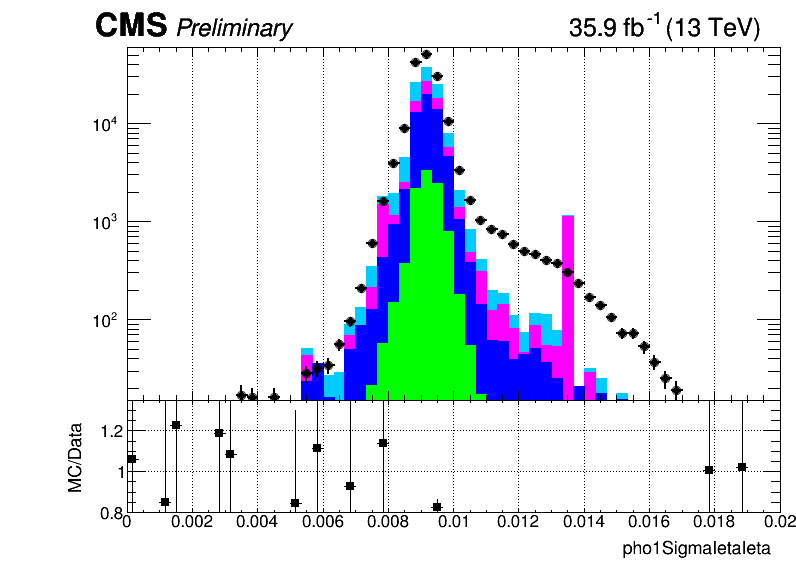

In [6]:
#### import plotLib.CMS_lumi as CMS_lumi
fea = 'pho1SigmaIetaIeta'
#fea = 'pho1ecalPFClusterIso'


import plotLib.tdrstyle as tdrstyle
import plotLib.CMS_lumi as CMS_lumi

tdrstyle.setTDRStyle()

rt.gStyle.SetOptStat(0)
#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Simulation Preliminary"
CMS_lumi.lumi_sqrtS = "35.9 fb^{-1} (13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)

iPos = 0
if( iPos==0 ): CMS_lumi.relPosX = 0.12

H_ref = 600;
W_ref = 800;
W = W_ref
H  = H_ref
iPeriod = 0

# references for T, B, L, R
T = 0.08*H_ref
B = 0.12*H_ref
L = 0.12*W_ref
R = 0.04*W_ref

beta = 1.

c1 = {}
leg = {}
h_dummy = {}

c1[fea] = rt.TCanvas("c1[{}]".format(fea),"",50, 50, W, H)
pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.95);
pad1.SetBottomMargin(0)
pad1.SetGridx()
pad1.Draw()
pad1.cd()
c1[fea].SetFillColor(0)
c1[fea].SetBorderMode(0)
c1[fea].SetFrameFillStyle(0)
c1[fea].SetFrameBorderMode(0)
c1[fea].SetLeftMargin( L/W )
c1[fea].SetRightMargin( R/W )
c1[fea].SetTopMargin( T/H )
c1[fea].SetBottomMargin( B/H )
c1[fea].SetTickx(0)
c1[fea].SetTicky(0)
rt.gStyle.SetOptStat(0)
#     h_dummy[fea] = signal_hist[fea].Clone("dummy{}".format(fea));
#     h_dummy[fea].SetTitle("")
#     h_dummy[fea].SetLineColor(0);
#     h_dummy[fea].SetFillColor(0);
#     h_dummy[fea].SetMarkerColor(0)
#     h_dummy[fea].GetYaxis().SetTitleOffset(1.1)
#     h_dummy[fea].SetDirectory(0)
#     # Get max Y
#     maxY = max([hsum.GetMaximum(), signal_hist[fea].GetMaximum(), allsn_hist[fea].GetMaximum()])
#     h_dummy[fea].SetAxisRange(1e-1,maxY*1.3,"Y")
#     h_dummy[fea].Draw()


hstack[fea].Draw("hist")
data_hist[fea].Draw('lep same')
hstack[fea].SetName("")
hstack[fea].GetXaxis().SetTitle(fea)
hstack[fea].GetXaxis().SetTitleSize(0.05)

#     signal_hist[fea].Draw("L same")
#     allsn_hist[fea].Draw("L same")

if useLogY[fea]:
    rt.gPad.SetLogy()
rt.gStyle.SetOptStat(0)
leg[fea] = rt.TLegend(0.2,0.6,0.45,0.90)
leg[fea].SetNColumns(2)
leg[fea].SetBorderSize(0)
leg[fea].AddEntry(hist_list[fea][sample_index['GJets']], "#gamma + jets", "f")
leg[fea].AddEntry(hist_list[fea][sample_index['DiPhoton']], "#gamma#gamma + jets", "f")
leg[fea].AddEntry(hist_list[fea][sample_index['QCD']], "QCD", "f")
leg[fea].AddEntry(hist_list[fea][sample_index['Z']], "EWK", "f")

leg[fea].AddEntry(data_hist[fea], "Data", "lep")

#leg[fea].Draw()
c1[fea].Draw()

#draw the lumi text on the c1[fea]
latex = rt.TLatex()
latex.SetTextFont(42)
latex.SetTextAngle(0)
latex.SetTextColor(rt.kBlack)
latex.SetTextSize(0.06)
latex.SetTextAlign(12)
CMS_lumi.extraText = "Preliminary"
CMS_lumi.CMS_lumi(c1[fea], iPeriod, iPos)

c1[fea].cd()

### Draw the ratio plot
pad2 = rt.TPad("pad2", "pad2", 0, 0.02, 1, 0.3);
pad2.SetTopMargin(0);
pad2.SetBottomMargin(0.3)
pad2.SetGrid()
pad2.Draw()
pad2.cd()

hsum = hstack[fea].GetStack().Last()
hr = hsum.Clone("hr");
hr.SetLineColor(rt.kBlack);
hr.SetMinimum(0.8)
hr.SetMaximum(1.35)
hr.Sumw2()
hr.SetStats(0)
hr.Divide(data_hist[fea])
hr.SetMarkerStyle(21);
hr.Draw("ep")   

hr.GetYaxis().SetTitle("MC/Data");
hr.GetYaxis().CenterTitle();
hr.GetYaxis().SetNdivisions(505);
hr.GetYaxis().SetTitleSize(20);
hr.GetYaxis().SetTitleFont(43);
hr.GetYaxis().SetTitleOffset(1.2);
hr.GetYaxis().SetLabelFont(43); 
hr.GetYaxis().SetLabelSize(18);

# X axis ratio plot settings
hr.GetXaxis().SetTitleSize(20);
hr.GetXaxis().SetTitleFont(43);
hr.GetXaxis().SetTitleOffset(4.);
hr.GetXaxis().SetLabelFont(43);
hr.GetXaxis().SetLabelSize(18);



#draw the lumi text on the c1[fea]
CMS_lumi.CMS_lumi(c1[fea], iPeriod, iPos)


c1[fea].cd()
c1[fea].Update()
c1[fea].RedrawAxis()
# frame = c1[fea].GetFrame()
# frame.Draw()




### Normalized histograms

211018.06647252385
35.9 fb^{-1} (13 TeV)
35.9 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1[pho1SigmaIetaIeta]
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


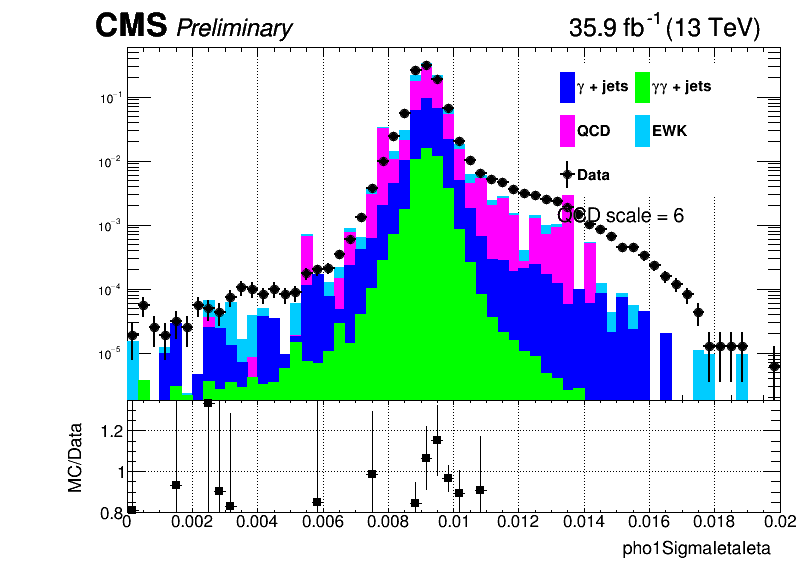

In [7]:

cloneStack = hstack[fea].Clone()
histlist = cloneStack.GetHists()

tempStackMC = rt.THStack()

beta = 6

# Scale QCD 
head = histlist.FirstLink()
while head:
    hist = head.GetObject()
    name = hist.GetName()
    if 'QCD' in name:
        hist.Scale(beta)
    tempStackMC.Add(hist)
    head = head.Next()
    
# Get sum hist background MC and data
sumMC = tempStackMC.GetStack().Last().Integral()
print(sumMC)
sumData = data_hist[fea].Integral()

# Normalize
cloneData = data_hist[fea].Clone()
cloneData.Scale(1./sumData)

newStackMC = rt.THStack()
histlist = tempStackMC.GetHists()
head = histlist.FirstLink()
while head:
    hist = head.GetObject()
    hist.Scale(1./sumMC)
    newStackMC.Add(hist)
    head = head.Next()
    
tdrstyle.setTDRStyle()

rt.gStyle.SetOptStat(0)
#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Simulation Preliminary"
CMS_lumi.lumi_sqrtS = "35.9 fb^{-1} (13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)

iPos = 0
if( iPos==0 ): CMS_lumi.relPosX = 0.12

H_ref = 600;
W_ref = 800;
W = W_ref
H  = H_ref
iPeriod = 0

# references for T, B, L, R
T = 0.08*H_ref
B = 0.12*H_ref
L = 0.12*W_ref
R = 0.04*W_ref


c1 = {}
leg = {}
h_dummy = {}

c1[fea] = rt.TCanvas("c1[{}]".format(fea),"",50, 50, W, H)
pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.95);
pad1.SetBottomMargin(0)
pad1.SetGridx()
pad1.Draw()
pad1.cd()
c1[fea].SetFillColor(0)
c1[fea].SetBorderMode(0)
c1[fea].SetFrameFillStyle(0)
c1[fea].SetFrameBorderMode(0)
c1[fea].SetLeftMargin( L/W )
c1[fea].SetRightMargin( R/W )
c1[fea].SetTopMargin( T/H )
c1[fea].SetBottomMargin( B/H )
c1[fea].SetTickx(0)
c1[fea].SetTicky(0)
rt.gStyle.SetOptStat(0)
#     h_dummy[fea] = signal_hist[fea].Clone("dummy{}".format(fea));
#     h_dummy[fea].SetTitle("")
#     h_dummy[fea].SetLineColor(0);
#     h_dummy[fea].SetFillColor(0);
#     h_dummy[fea].SetMarkerColor(0)
#     h_dummy[fea].GetYaxis().SetTitleOffset(1.1)
#     h_dummy[fea].SetDirectory(0)
#     # Get max Y
#     maxY = max([hsum.GetMaximum(), signal_hist[fea].GetMaximum(), allsn_hist[fea].GetMaximum()])
#     h_dummy[fea].SetAxisRange(1e-1,maxY*1.3,"Y")
#     h_dummy[fea].Draw()

cloneData.Draw('lep')
newStackMC.Draw("hist same")
cloneData.Draw('lep same')
newStackMC.SetName("")
newStackMC.GetXaxis().SetTitle(fea)
newStackMC.GetXaxis().SetTitleSize(0.05)
newStackMC.GetYaxis().SetTitle("Events")
newStackMC.GetYaxis().SetTitleSize(0.05)
newStackMC.GetYaxis().SetTitleOffset(1.2)
#     signal_hist[fea].Draw("L same")
#     allsn_hist[fea].Draw("L same")

if useLogY[fea]:
    rt.gPad.SetLogy()
rt.gStyle.SetOptStat(0)
#leg[fea] = rt.TLegend(0.2,0.6,0.45,0.90)
leg[fea] = rt.TLegend(0.7,0.55,0.9,0.90)

leg[fea].SetNColumns(2)
leg[fea].SetBorderSize(0)
leg[fea].AddEntry(hist_list[fea][sample_index['GJets']], "#gamma + jets", "f")
leg[fea].AddEntry(hist_list[fea][sample_index['DiPhoton']], "#gamma#gamma + jets", "f")
leg[fea].AddEntry(hist_list[fea][sample_index['QCD']], "QCD", "f")
leg[fea].AddEntry(hist_list[fea][sample_index['Z']], "EWK", "f")

leg[fea].AddEntry(data_hist[fea], "Data", "lep")

leg[fea].Draw()
c1[fea].Draw()

latex = rt.TLatex()
latex.SetTextFont(42)
latex.SetTextAngle(0)
latex.SetTextColor(rt.kBlack)
latex.SetTextSize(0.06)
latex.SetTextAlign(12)
latex.SetNDC()
latex.DrawLatex(0.7, 0.5,"QCD scale = {}".format(beta))

CMS_lumi.extraText = "Preliminary"
CMS_lumi.CMS_lumi(c1[fea], iPeriod, iPos)

### Draw the ratio plot
pad2 = rt.TPad("pad2", "pad2", 0, 0.02, 1, 0.3);
pad2.SetTopMargin(0);
pad2.SetBottomMargin(0.3)
pad2.SetGrid()
pad2.Draw()
pad2.cd()

hsum = newStackMC.GetStack().Last()
hr = hsum.Clone("hr");
hr.SetLineColor(rt.kBlack);
hr.SetMinimum(0.8)
hr.SetMaximum(1.35)
hr.Sumw2()
hr.SetStats(0)
hr.Divide(cloneData)
hr.SetMarkerStyle(21);
hr.Draw("ep")   

hr.GetYaxis().SetTitle("MC/Data");
hr.GetYaxis().CenterTitle();
hr.GetYaxis().SetNdivisions(505);
hr.GetYaxis().SetTitleSize(20);
hr.GetYaxis().SetTitleFont(43);
hr.GetYaxis().SetTitleOffset(1.2);
hr.GetYaxis().SetLabelFont(43); 
hr.GetYaxis().SetLabelSize(18);

# X axis ratio plot settings
hr.GetXaxis().SetTitleSize(20);
hr.GetXaxis().SetTitleFont(43);
hr.GetXaxis().SetTitleOffset(4.);
hr.GetXaxis().SetLabelFont(43);
hr.GetXaxis().SetLabelSize(18);



#draw the lumi text on the c1[fea]
CMS_lumi.CMS_lumi(c1[fea], iPeriod, iPos)


c1[fea].cd()
c1[fea].Update()
c1[fea].RedrawAxis()
# frame = c1[fea].GetFrame()
# frame.Draw()


